In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [5]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [6]:
num_of_classes = 10

model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [7]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 638s 423ms/step - loss: 1.9570 - acc: 0.2892 - val_loss: 4.4381 - val_acc: 0.2574
Epoch 2/10
1407/1407 [==============================] - 592s 421ms/step - loss: 1.3547 - acc: 0.5252 - val_loss: 1.1660 - val_acc: 0.5758
Epoch 3/10
1407/1407 [==============================] - 591s 420ms/step - loss: 1.1372 - acc: 0.6112 - val_loss: 0.9277 - val_acc: 0.6816
Epoch 4/10
1407/1407 [==============================] - 589s 419ms/step - loss: 1.0087 - acc: 0.6600 - val_loss: 0.9177 - val_acc: 0.6794
Epoch 5/10
1407/1407 [==============================] - 596s 424ms/step - loss: 0.9069 - acc: 0.6988 - val_loss: 0.8394 - val_acc: 0.7096
Epoch 6/10
1407/1407 [==============================] - 597s 424ms/step - loss: 0.8240 - acc: 0.7267 - val_loss: 0.9605 - val_acc: 0.6884
Epoch 7/10
1407/1407 [==============================] - 598s 425ms/step - loss: 0.7592 - acc: 0.7509 - val_loss: 1.0398 - val_acc: 0.6934
Epoch 8/10
1407/1407 [============

In [9]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 123ms/step - loss: 0.8090 - acc: 0.7411
Test Accuracy = 0.741100013256073


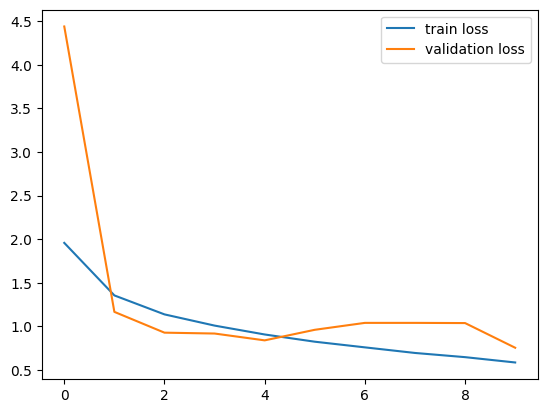

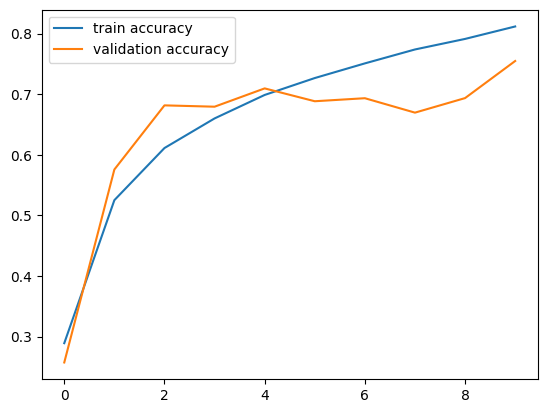

In [10]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()